In [1]:
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

import networkx.algorithms.community as comms

In [2]:
DATA = '../Data/out.moreno_crime_crime'
ROLE = '../Data/rel.moreno_crime_crime.person.role'
NAME = '../Data/ent.moreno_crime_crime.person.name'
SEX =  '../Data/ent.moreno_crime_crime.person.sex'

In [3]:
with open(DATA) as f:
    data = f.read().splitlines()
    
with open(ROLE) as f:
    role = f.read().splitlines()
    
with open(NAME) as f:
    name = f.read().splitlines()
    
with open(SEX) as f:
    sex = f.read().splitlines()
    
for i in range(len(data)):
    data[i] = 'p' + data[i] # adds 'p' to the People nodes to differentiate them

In [4]:
#Read in graph and find and isolate the greatest connected component

B = nx.read_edgelist(data)
graph = np.loadtxt(DATA, dtype=str)
a = np.unique(graph[:,0]) # people nodes
b = np.unique(graph[:,1]) # crime nodes
a = ['p' + a for a in a] # add string to differentiate

G = nx.Graph()

# add nodes
for j in range(len(a)):
    G.add_node(a[j], bipartite=0, data=True, name=name[j], sex=sex[j]) #Add attributes name and sex

G.add_nodes_from(b, bipartite=1, data=True)

# add edges
i = 0
for edge in B.edges():
    G.add_edge(edge[0], edge[1], role=role[i]) # why role is in a list?
    i+=1

p_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0} # people
c_nodes = set(G) - p_nodes # crimes

# components in the graph sorted in descendent order
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
# selecting the biggest component
G0 = G.subgraph(Gcc[0])

P 754 2127


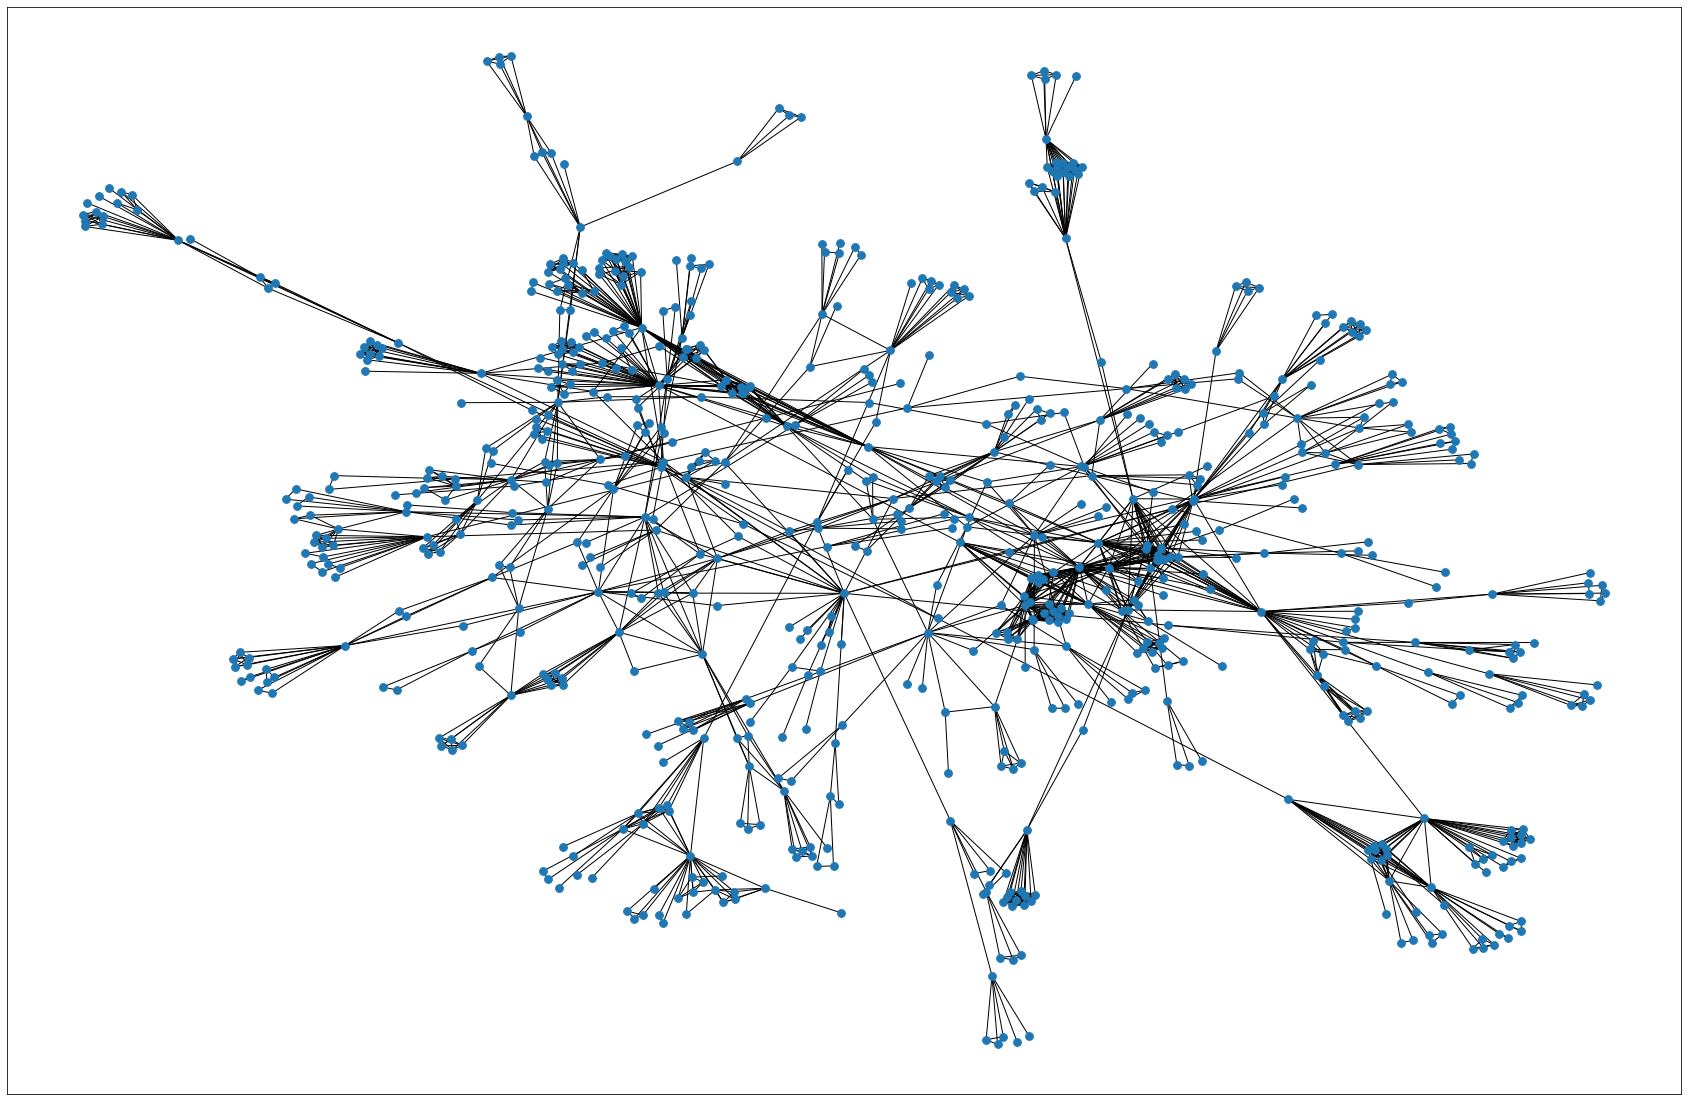

In [5]:
#Seperate the nodes for People and Crimes
p_nodes_gcc = {n for n, d in G0.nodes(data=True) if d["bipartite"] == 0}
c_nodes_gcc = set(G0) - p_nodes_gcc

#print(len(p_nodes_gcc), len(c_nodes_gcc))

# project onto people and visualise
P = bipartite.weighted_projected_graph(G0, p_nodes_gcc)

print('P',len(P.nodes()), len(P.edges()))

plt.rcParams.update({'figure.figsize': (30, 20)})
pos = nx.spring_layout(P, seed=23)

nx.draw_networkx(P, pos, node_size=60, with_labels=False)

In [6]:
POI = 'p815' #set a Person of Interest

communities = sorted(comms.greedy_modularity_communities(P), key=len, reverse=True) #30 coms modularity 0.845
#communities = sorted(comms.label_propagation_communities(P), key=len, reverse=True) #89 coms modularity 0.787

# Count the communities
print(f"There are {len(communities)} communities.")

comms.modularity(P, communities)

for i in range(len(communities)):
    if POI in communities[i]:
        print(i)
        highlight = i

There are 30 communities.
2


0 122
1 84
2 63
3 55
4 55
5 45
6 34
7 30
8 30
9 28


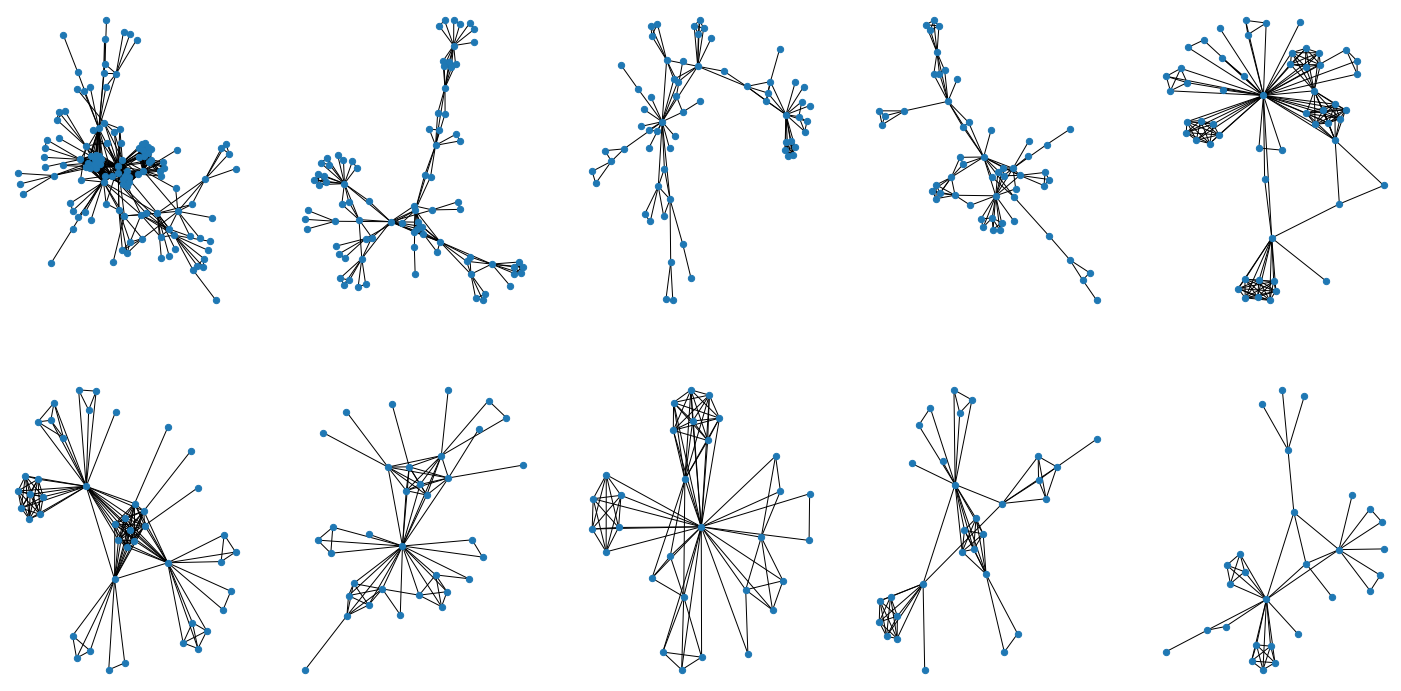

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
fig.tight_layout()

for i in range(0,10): 
    com = P.subgraph(communities[i])
    print(i, len(com.nodes))
    plt.subplot(2,5,i+1)
    nx.draw_spring(com, node_size=40) #, with_labels=True
#plt.savefig(f'../Figures/1-10_community.jpg')

10 26
11 25
12 24
13 14
14 14
15 14
16 13
17 9
18 8
19 8


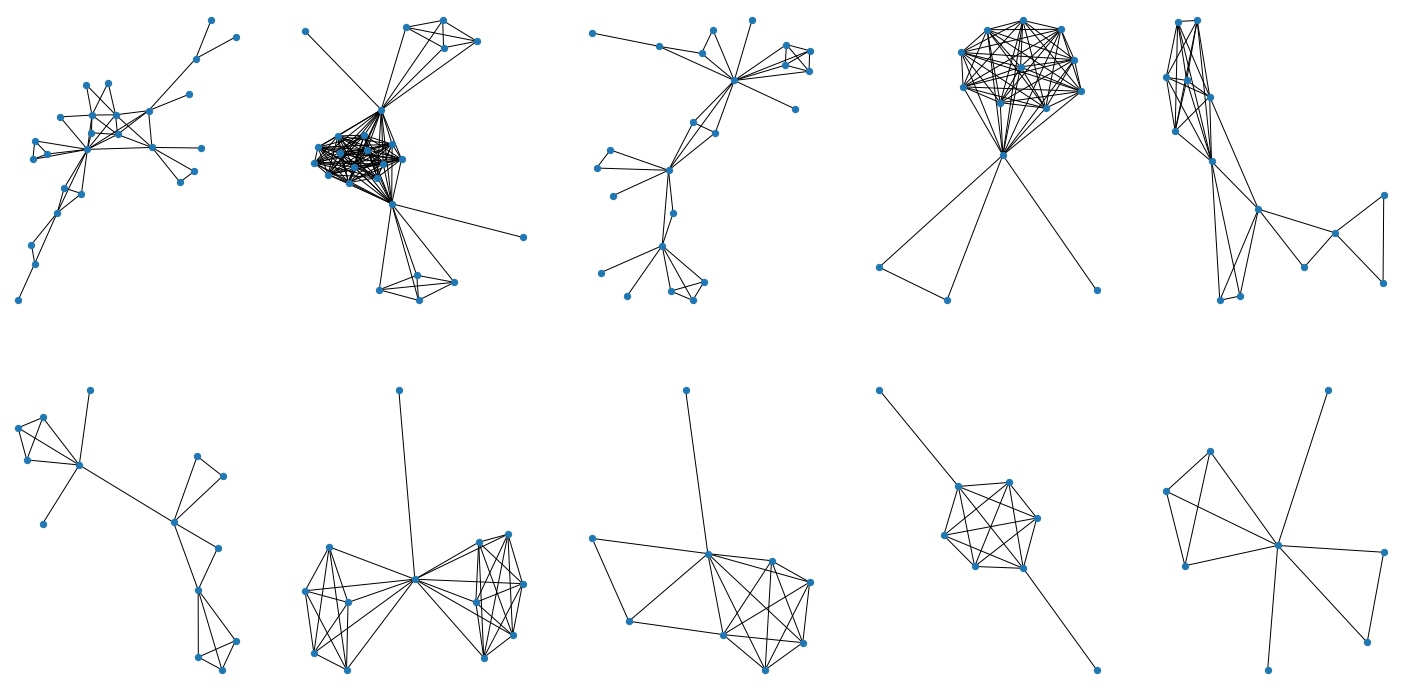

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
fig.tight_layout()

for i in range(10,20): 
    com = P.subgraph(communities[i])
    print(i, len(com.nodes))
    plt.subplot(2,5,i-9)
    nx.draw_spring(com, node_size=40)
#plt.savefig(f'../Figures/11-20_community.jpg')

20 7
21 7
22 7
23 6
24 6
25 5
26 4
27 4
28 4
29 3


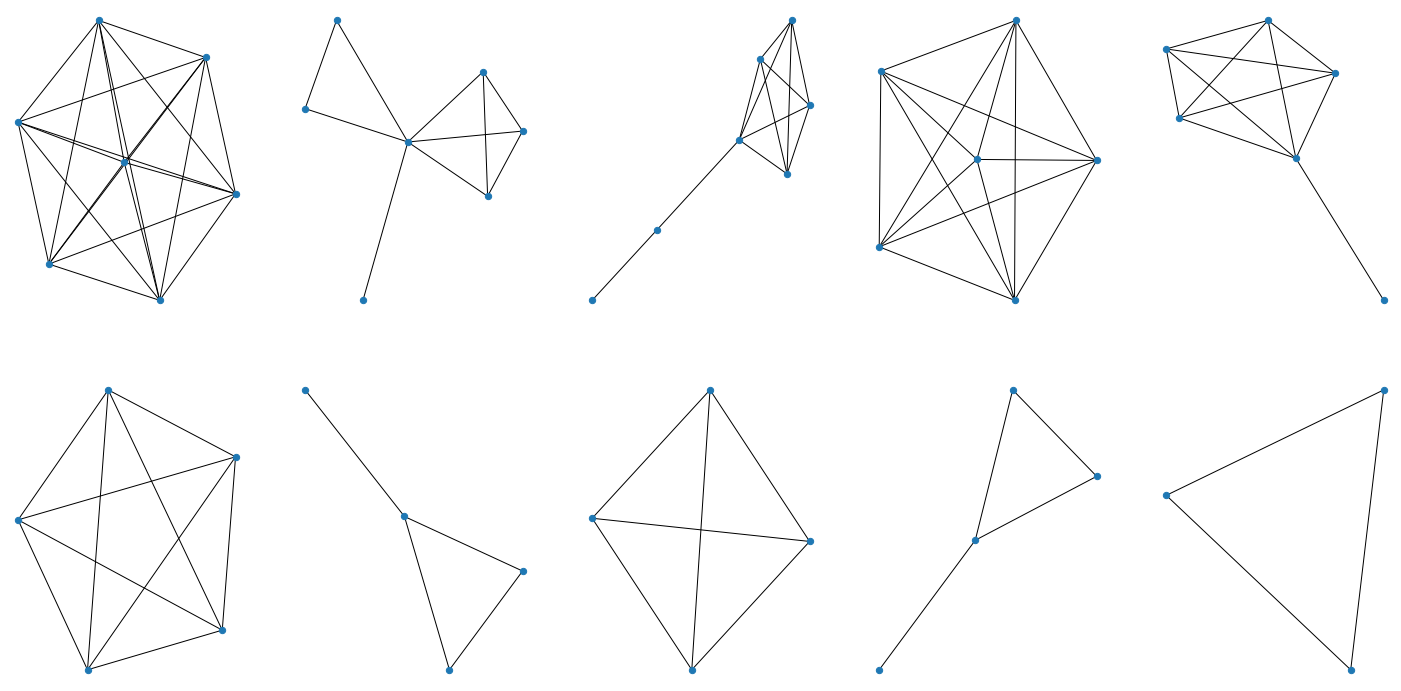

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
fig.tight_layout()

for i in range(20,30): 
    com = P.subgraph(communities[i])
    print(i, len(com.nodes))
    plt.subplot(2,5,i-19)
    nx.draw_spring(com, node_size=40)
#plt.savefig(f'../Figures/21-30_community.jpg')

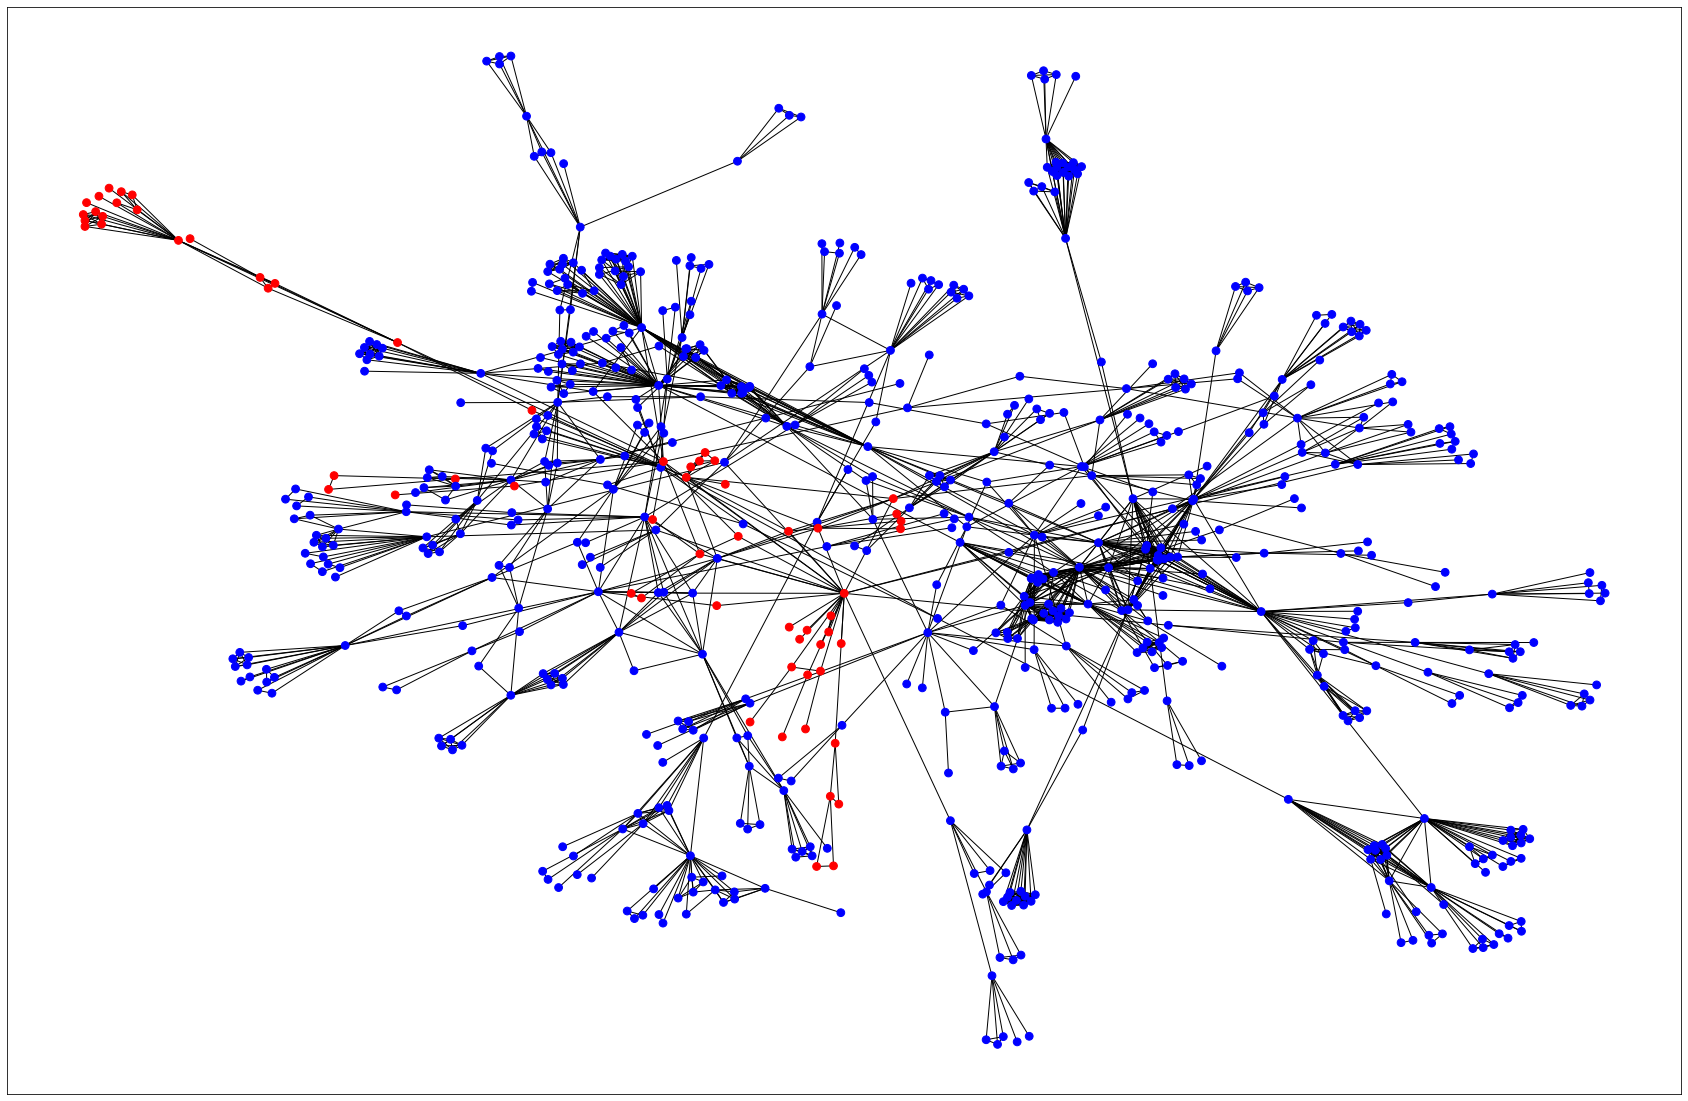

In [10]:
#highlight = 11 #choose a community to highlight via it's index in the communities list

node_col = []

for node in P.nodes():
    if node in communities[highlight]:
        node_col.append('red')
    else:
        node_col.append('blue')


plt.rcParams.update({'figure.figsize': (30, 20)})
pos = nx.spring_layout(P, seed=23)

nx.draw_networkx(P, pos, node_size=60, node_color=node_col, with_labels=False)

plt.savefig(f'../Figures/community_{highlight}_people_projection.jpg')

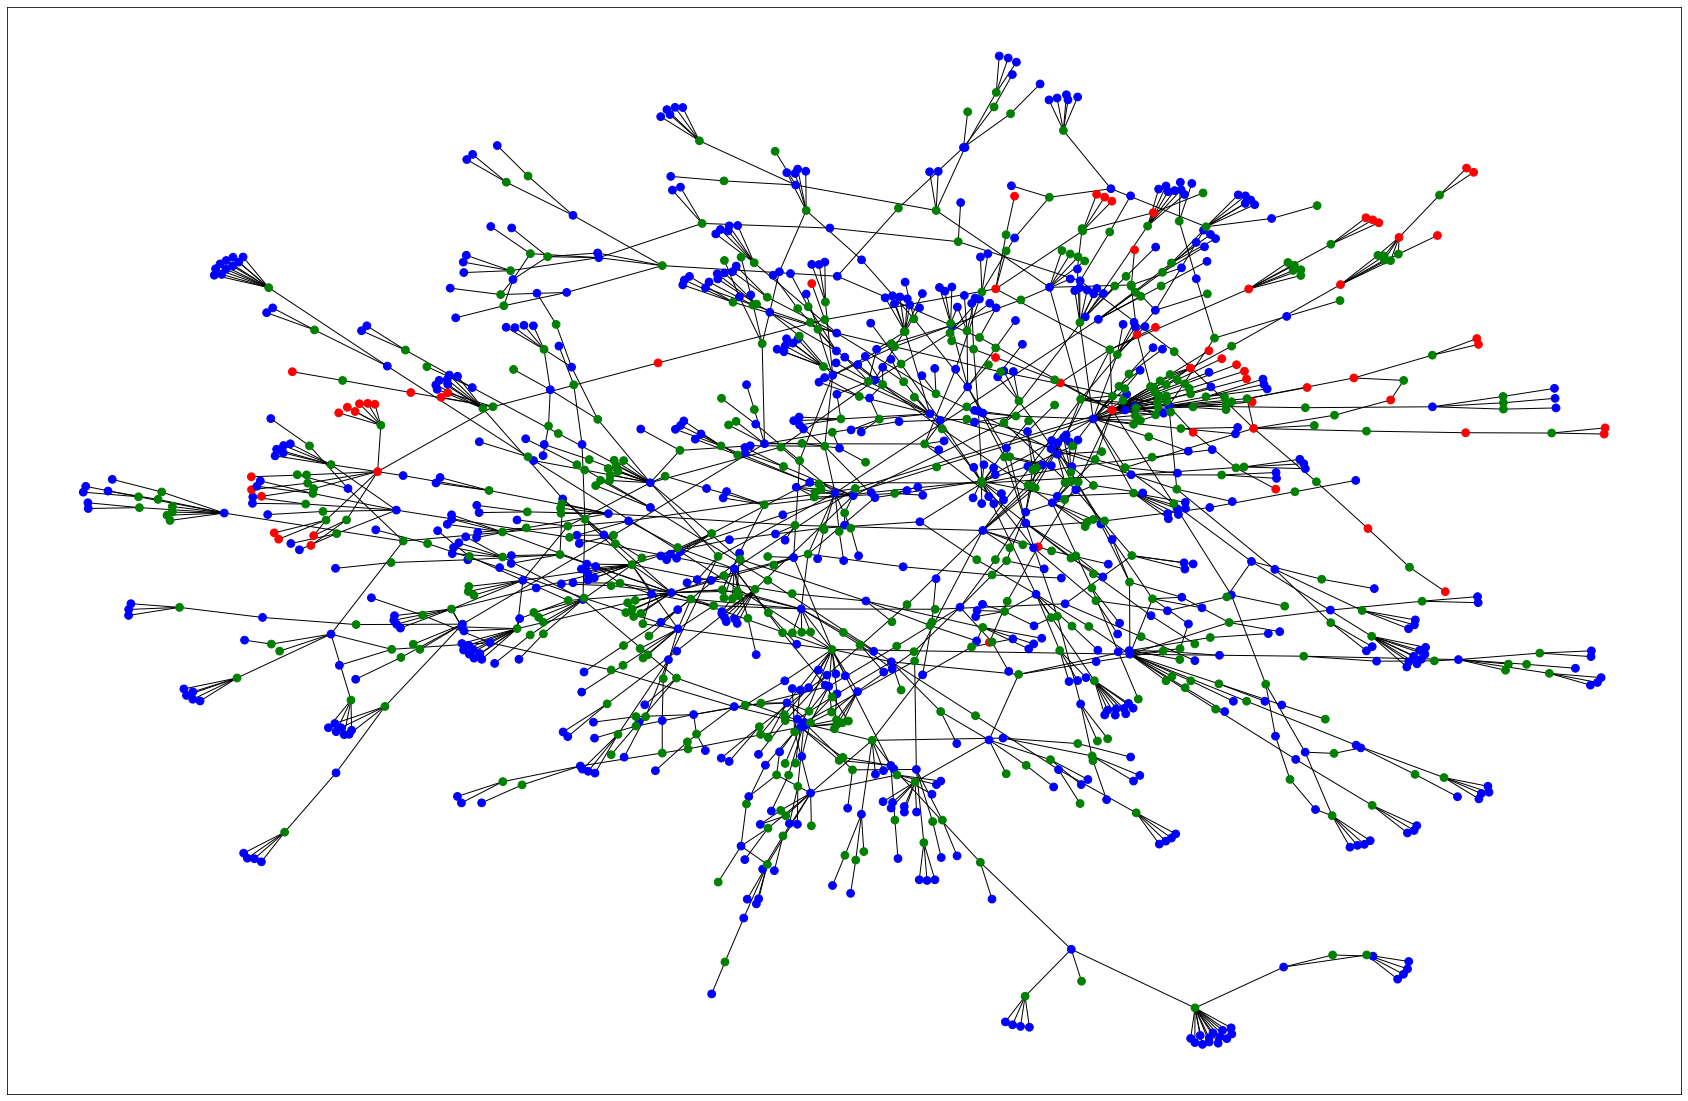

In [11]:
node_col = []

for node in G0.nodes():
    if node in communities[highlight]:
        node_col.append('red')
    elif node in c_nodes_gcc:
        node_col.append('green')
    else:
        node_col.append('blue')


plt.rcParams.update({'figure.figsize': (30, 20)})
pos = nx.spring_layout(G0, seed=23)

nx.draw_networkx(G0, pos, node_size=60, node_color=node_col, with_labels=False)

plt.savefig(f'../Figures/community_{highlight}_lcc_no projection.jpg')

In [12]:
ed = []
lab = {}

for per in communities[highlight]:
    print('\n------\n\n',nx.get_node_attributes(G, 'name')[per], nx.get_node_attributes(G, 'sex')[per])
    lab[per] = (nx.get_node_attributes(G, 'name')[per], per)
    for c in G.edges([per]):
        print(c, nx.get_edge_attributes(G0, 'role')[c])
        ed.append(c[1])
        lab[c[1]] = f'{c[1]}'


------

 WeaverPriscilla 0
('p810', '326') Suspect

------

 ShermanAmos 1
('p705', '529') Suspect

------

 MarkessQueenie 0
('p548', '486') Witness

------

 BrownReggie 1
('p195', '60') Victim

------

 BarkerCatherine 0
('p133', '204') Witness

------

 WashingtonCraig 1
('p809', '160') Witness
('p809', '326') Suspect
('p809', '347') Suspect

------

 BryantMarcia 0
('p199', '255') Suspect
('p199', '256') Witness

------

 CullomRita 0
('p273', '326') Victim

------

 BrowningCalder 1
('p196', '60') Suspect

------

 MadisonSonny 1
('p536', '47') Victim Suspect
('p536', '53') Victim
('p536', '204') Suspect
('p536', '208') Suspect
('p536', '482') Witness

------

 CandyCarol 0
('p21', '52') Witness
('p21', '53') Victim

------

 NaderChip 1
('p596', '499') Witness

------

 RussellGreg 1
('p690', '23') Suspect
('p690', '160') Victim Suspect
('p690', '183') Suspect
('p690', '348') Victim
('p690', '517') Victim
('p690', '518') Victim
('p690', '519') Suspect

------

 DeeBetty 0
('p29

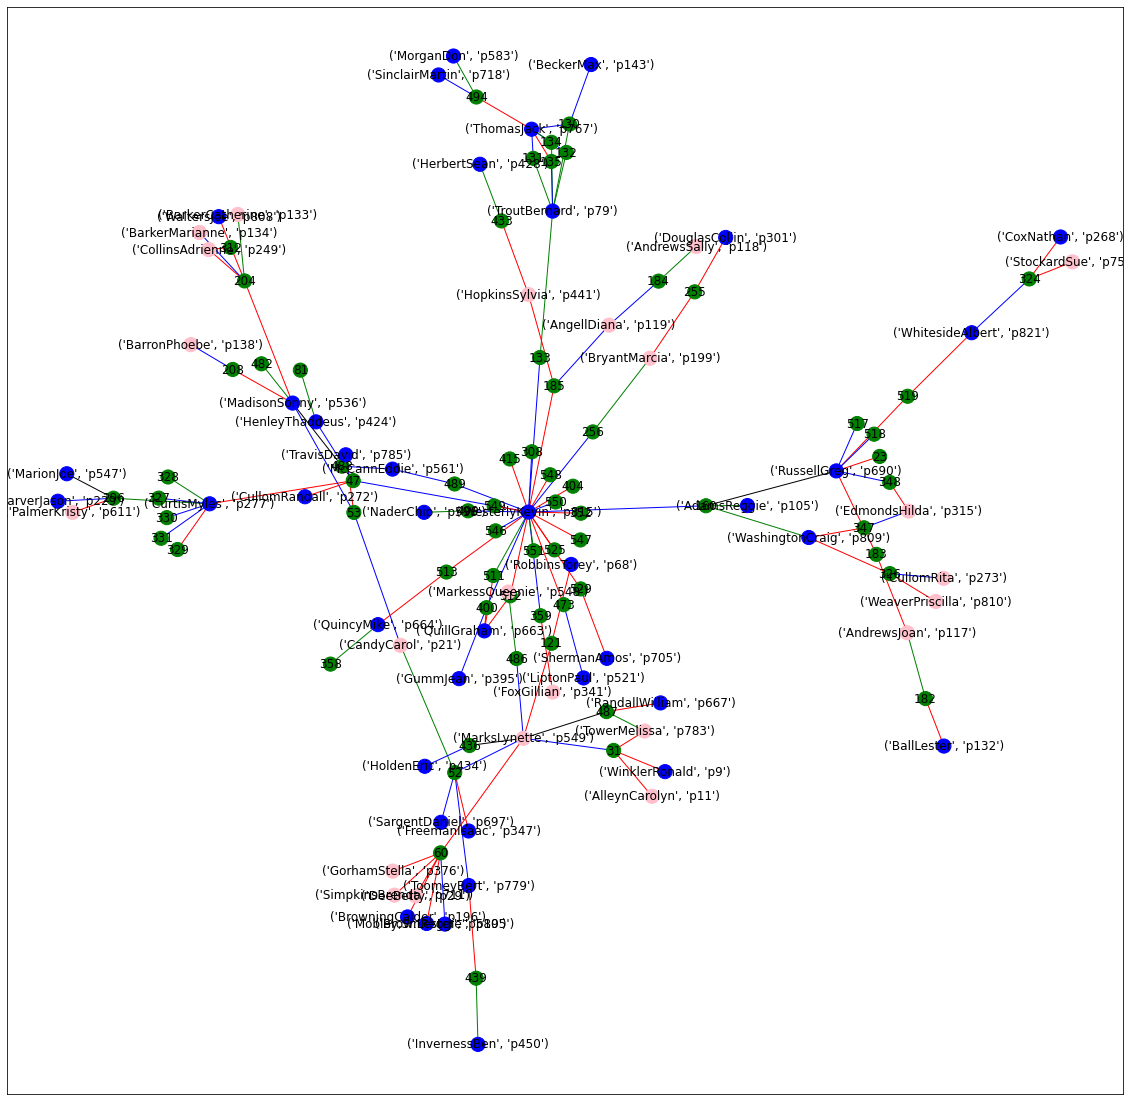

In [13]:
for i in communities[highlight]:
    ed.append(i)

nc = []
ec = []

hi = G0.subgraph(ed)

for node in hi:
    if node in communities[highlight]:
        if nx.get_node_attributes(G, 'sex')[node] == '1':
            nc.append('blue')
        else:
            nc.append('pink')
    elif node in c_nodes_gcc:
        nc.append('green')
    else:
        nc.append('yellow') #none should ever show yellow!! something is wrong if they do
        
for edge in hi.edges():
    a = nx.get_edge_attributes(hi, 'role')[edge]
    if a == 'Victim':
        ec.append('blue')
    elif a == 'Suspect':
        ec.append('red')
    elif a == 'Witness':
        ec.append('green')
    else:
        ec.append('black')
        
        

plt.rcParams.update({'figure.figsize': (20, 20)})
pos = nx.spring_layout(hi, seed=23)

nx.draw_networkx(hi, pos, node_size=200, node_color=nc, edge_color=ec, labels=lab)

plt.savefig(f'../Figures/community_{highlight}_focus_labelled.jpg')

## Now same again, but using crimes as projection.

C 509 2284


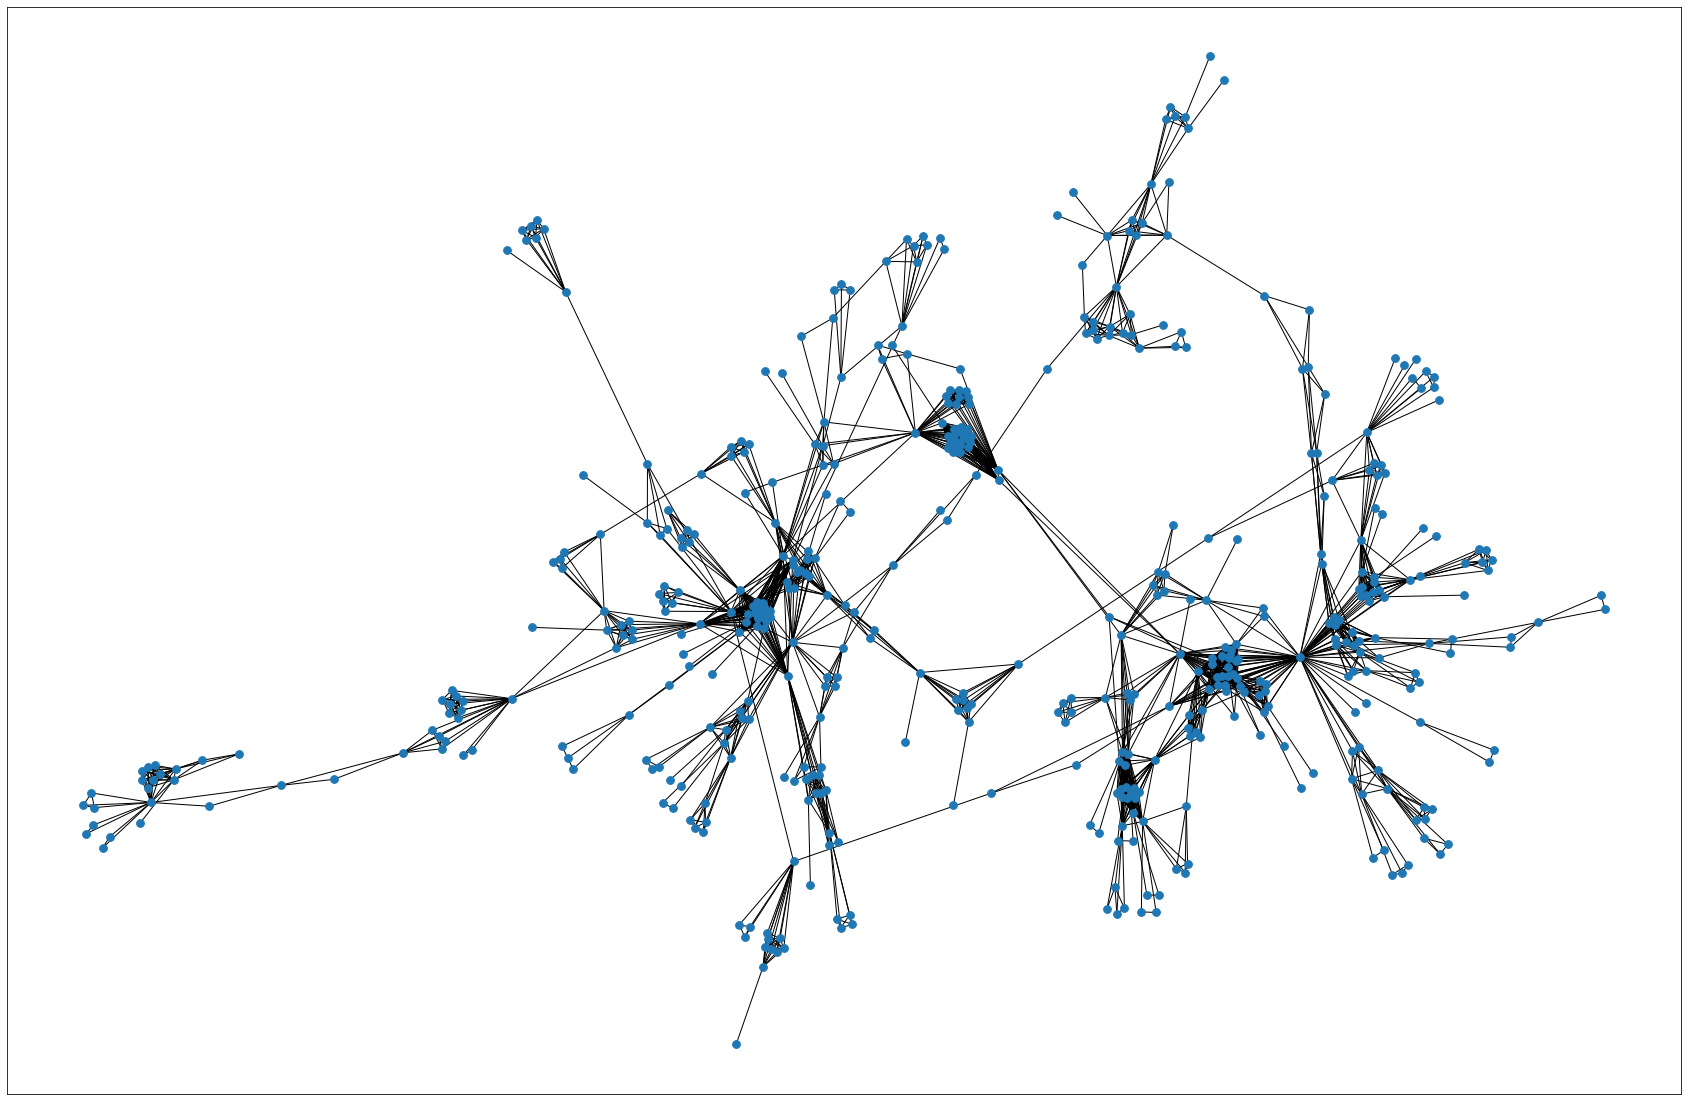

In [14]:
# project onto crimes and visualise
C = bipartite.weighted_projected_graph(G0, c_nodes_gcc)

print('C',len(C.nodes()), len(C.edges()))

plt.rcParams.update({'figure.figsize': (30, 20)})
pos = nx.spring_layout(C, seed=23)

nx.draw_networkx(C, pos, node_size=60, with_labels=False)

In [15]:
communities_c = sorted(comms.greedy_modularity_communities(C), key=len, reverse=True) #14 coms modularity 0.813
#communities_c = sorted(comms.label_propagation_communities(C), key=len, reverse=True) #50 coms modularity 0.763

# Count the communities
print(f"There are {len(communities_c)} communities.")

comms.modularity(C, communities_c)

There are 14 communities.


0.8133931270647268

0 76
1 56
2 48
3 43
4 43
5 42
6 39
7 37
8 36
9 34


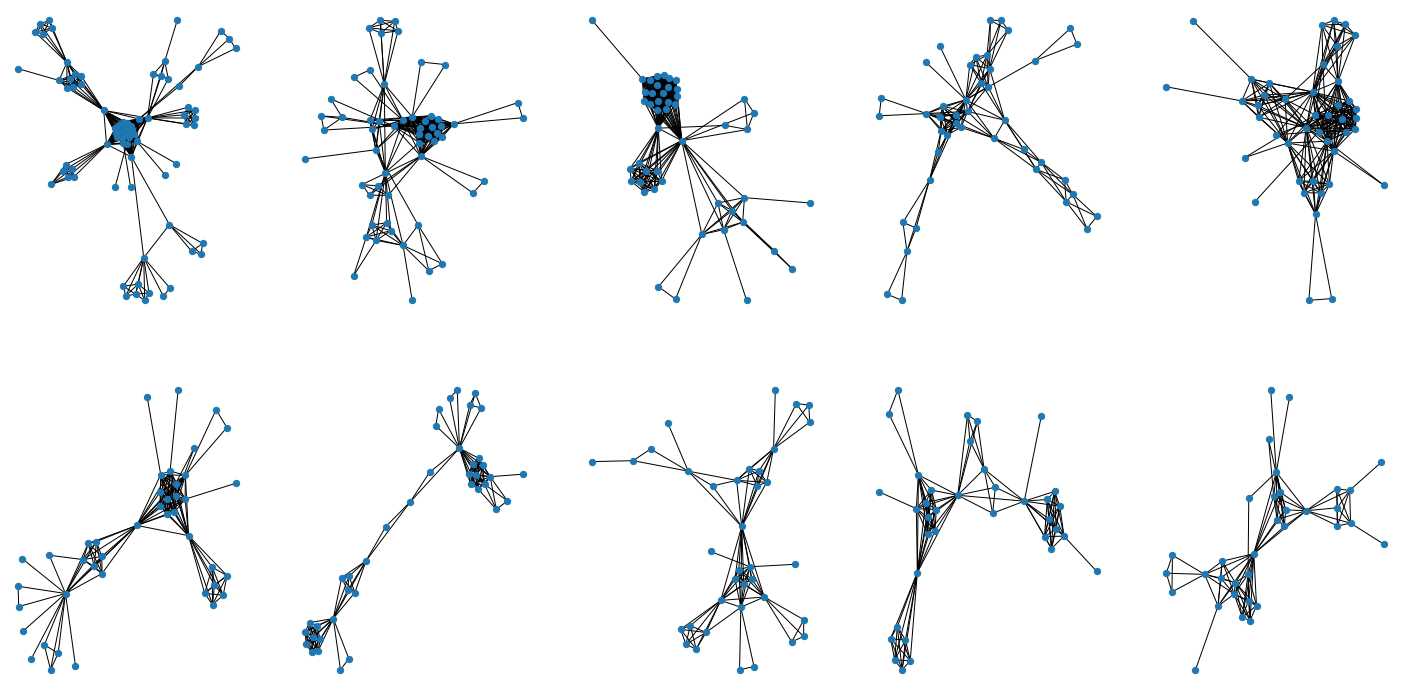

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
fig.tight_layout()

for i in range(0,10): 
    com = C.subgraph(communities_c[i])
    print(i, len(com.nodes))
    plt.subplot(2,5,i+1)
    nx.draw_spring(com, node_size=40) #, with_labels=True
#plt.savefig(f'../Figures/1-10_C_community.jpg')

10 18
11 16
12 13
13 8


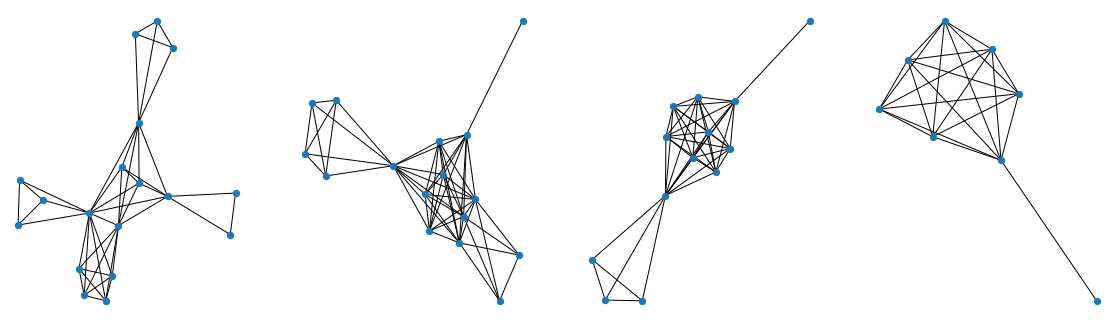

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
fig.tight_layout()

for i in range(10,14): 
    com = C.subgraph(communities_c[i])
    print(i, len(com.nodes))
    plt.subplot(2,5,i-9)
    nx.draw_spring(com, node_size=40) #, with_labels=True
#plt.savefig(f'../Figures/11-14_C_community.jpg')

0


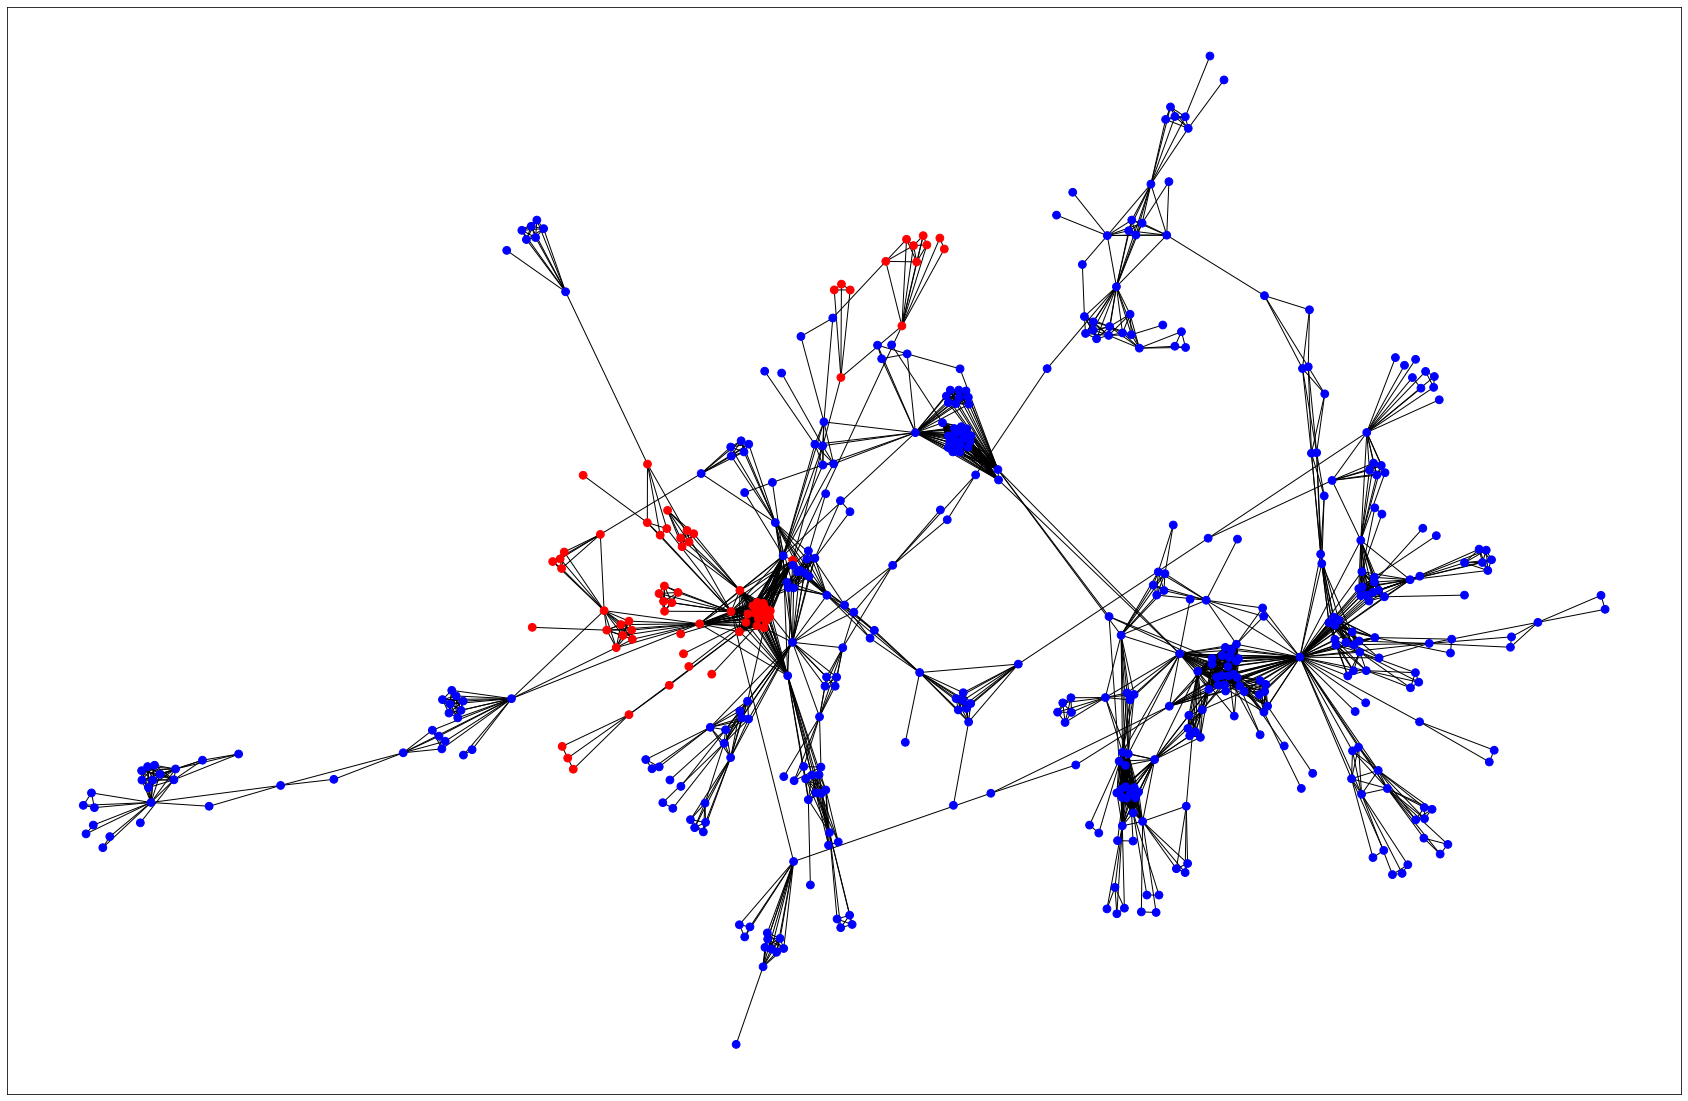

In [18]:
COI = '415'
for i in range(len(communities_c)):
    if COI in communities_c[i]:
        print(i)
        highlight = i

#highlight = 13 #choose a community to highlight via it's index in the communities list

node_col = []

for node in C.nodes():
    if node in communities_c[highlight]:
        node_col.append('red')
    else:
        node_col.append('blue')


plt.rcParams.update({'figure.figsize': (30, 20)})
pos = nx.spring_layout(C, seed=23)

nx.draw_networkx(C, pos, node_size=60, node_color=node_col, with_labels=False)

plt.savefig(f'../Figures/community_{highlight}_crime_projection.jpg')

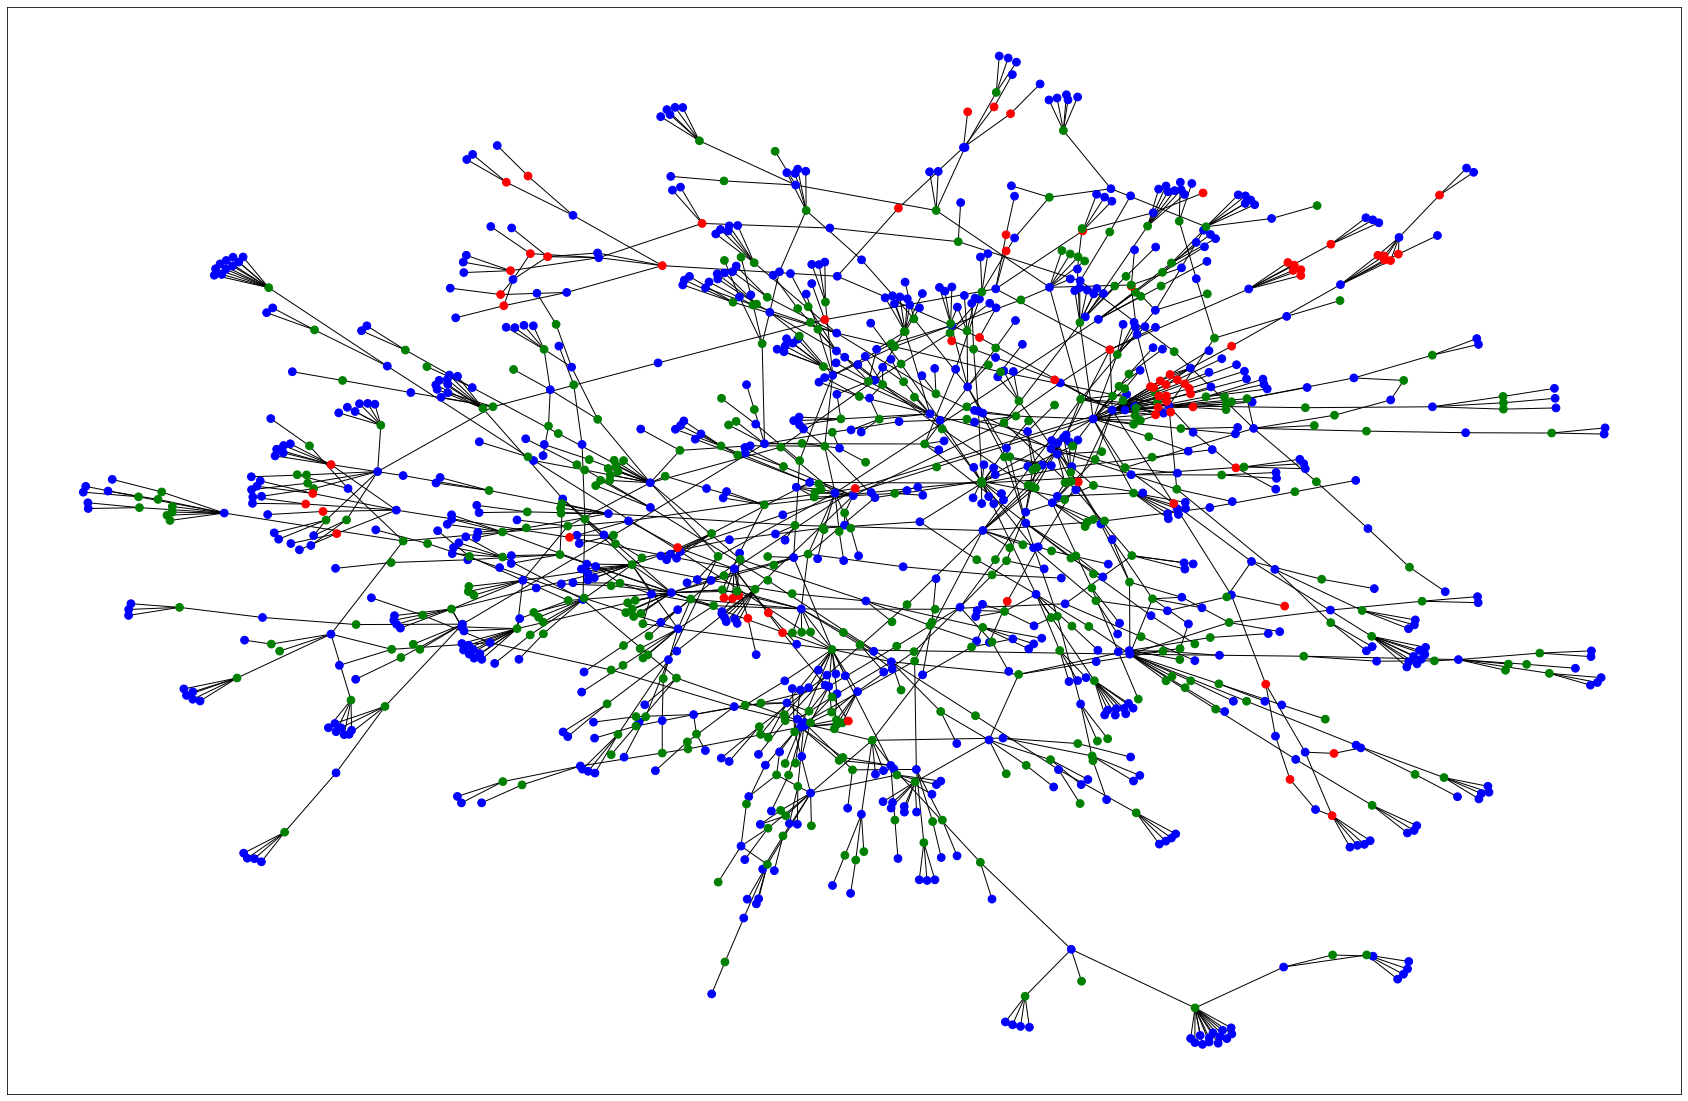

In [19]:
node_col = []

for node in G0.nodes():
    if node in communities_c[highlight]:
        node_col.append('red')
    elif node in p_nodes_gcc:
        node_col.append('blue')
    else:
        node_col.append('green')


plt.rcParams.update({'figure.figsize': (30, 20)})
pos = nx.spring_layout(G0, seed=23)

nx.draw_networkx(G0, pos, node_size=60, node_color=node_col, with_labels=False)

plt.savefig(f'../Figures/c_community_{highlight}_lcc_no projection.jpg')

In [20]:
lab = {}
no = []
ec = []
nc = []

for cri in communities_c[highlight]:
    no.append(cri)
    lab[cri] = f'{cri}'
    for edge in G0.edges(cri):
        no.append(edge[1])
    
no = set(no)       
for node in no:
    if node in c_nodes_gcc:
        nc.append('green')
        
    elif nx.get_node_attributes(G, 'sex')[node] == '1':
        nc.append('blue')
        lab[node] = (nx.get_node_attributes(G, 'name')[node], node)
    else:
        nc.append('pink')
        lab[node] = (nx.get_node_attributes(G, 'name')[node], node)

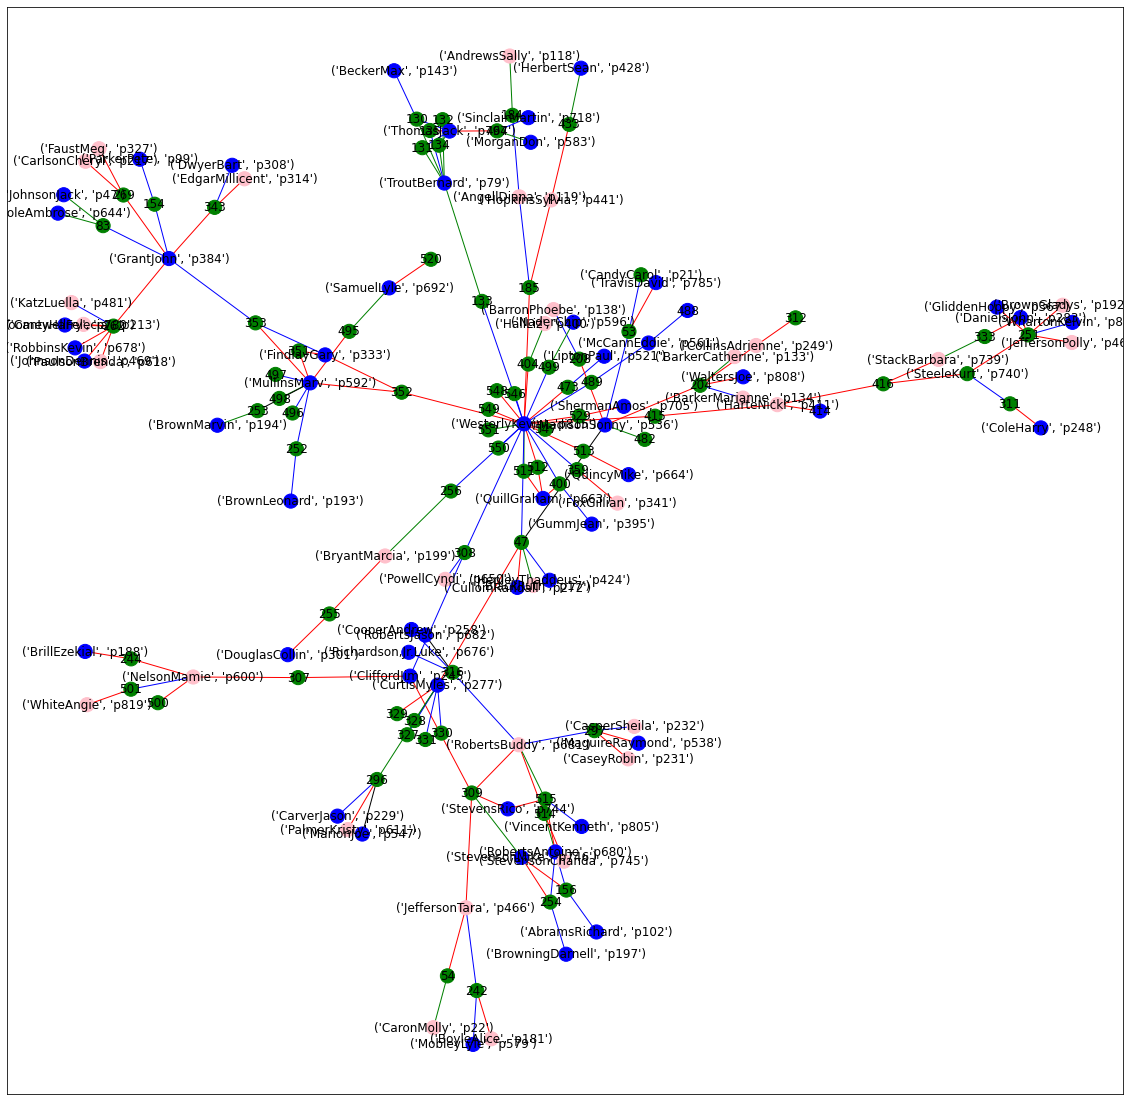

In [21]:
hi = G0.subgraph(no)
ec = []

for c in hi.edges():
    a = nx.get_edge_attributes(hi, 'role')[c]
    if a == 'Victim':
        ec.append('blue')
    elif a == 'Suspect':
        ec.append('red')
    elif a == 'Witness':
        ec.append('green')
    else:
        ec.append('black')

plt.rcParams.update({'figure.figsize': (20, 20)})
pos = nx.spring_layout(hi, seed=23)

nx.draw_networkx(hi, pos, node_size=200, edge_color=ec, node_color = nc, labels=lab)

plt.savefig(f'../Figures/c_community_{highlight}_focus_labelled.jpg')